<a href="https://colab.research.google.com/github/viola04/Dataset-Daun-Jambu-Biji-dan-Seledri_-121_122/blob/main/Datasettest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Klasifikasi Dataset Herbal Leaf Dengan Metode CNN****


Mount google colab ke google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menampilkan isi folder pada direktory dataset

In [ ]:
!ls "/content/drive/MyDrive/AI/Dataset"

Report	test  training	validation


Mengatur directory folder pada Google Drive

In [ ]:
import os
base_dir = '/content/drive/MyDrive/AI/Dataset'
training_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training DaunJambuBiji pictures
training_DaunJambuBiji_dir = os.path.join(training_dir, 'DaunJambuBiji')

# Directory with our training DaunSeledri pictures
training_DaunSeledri_dir = os.path.join(training_dir, 'DaunSeledri')

# Directory with our validation DaunJambuBiji pictures
validation_DaunJambuBiji_dir = os.path.join(validation_dir, 'DaunJambuBiji')

# Directory with our validation DaunSeledri pictures
validation_DaunSeledri_dir = os.path.join(validation_dir, 'DaunSeledri')

Melihat isi file 5 teratas pada folder training dan validation


In [ ]:
training_DaunJambuBijis_fnames = os.listdir(training_DaunJambuBiji_dir)
print(training_DaunJambuBijis_fnames[:5])
training_DaunSeledris_fnames = os.listdir(training_DaunSeledri_dir)
print(training_DaunSeledris_fnames[:5])

validation_DaunJambuBijis_fnames = os.listdir(validation_DaunJambuBiji_dir)
print(validation_DaunJambuBijis_fnames[:5])
validation_DaunSeledris_fnames = os.listdir(validation_DaunSeledri_dir)
print(validation_DaunSeledris_fnames[:5])

['008.jpeg', '005.jpeg', '010.jpeg', '009.jpeg', '002.jpeg']
['001.jpeg', '006.jpeg', '013.jpeg', '016.jpeg', '003.jpeg']
['049.jpeg', '043.jpeg', '047.jpeg', '016.jpeg', '036.jpeg']
['045.jpeg', '037.jpeg', '046.jpeg', '031.jpeg', '033.jpeg']


Melihat jumlah data pada folder train dan validation

In [ ]:
print('total training DaunJambuBiji images:', len(os.listdir(training_DaunJambuBiji_dir)))
print('total training DaunSeledri images:', len(os.listdir(training_DaunSeledri_dir)))
print('total validation DaunJambuBiji images:', len(os.listdir(validation_DaunJambuBiji_dir)))
print('total validation DaunSeledri images:', len(os.listdir(validation_DaunSeledri_dir)))

total training DaunJambuBiji images: 50
total training DaunSeledri images: 50
total validation DaunJambuBiji images: 50
total validation DaunSeledri images: 50


Menampilkan beberapa sampel citra

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 10

# Index for iterating over images
pic_index = 0

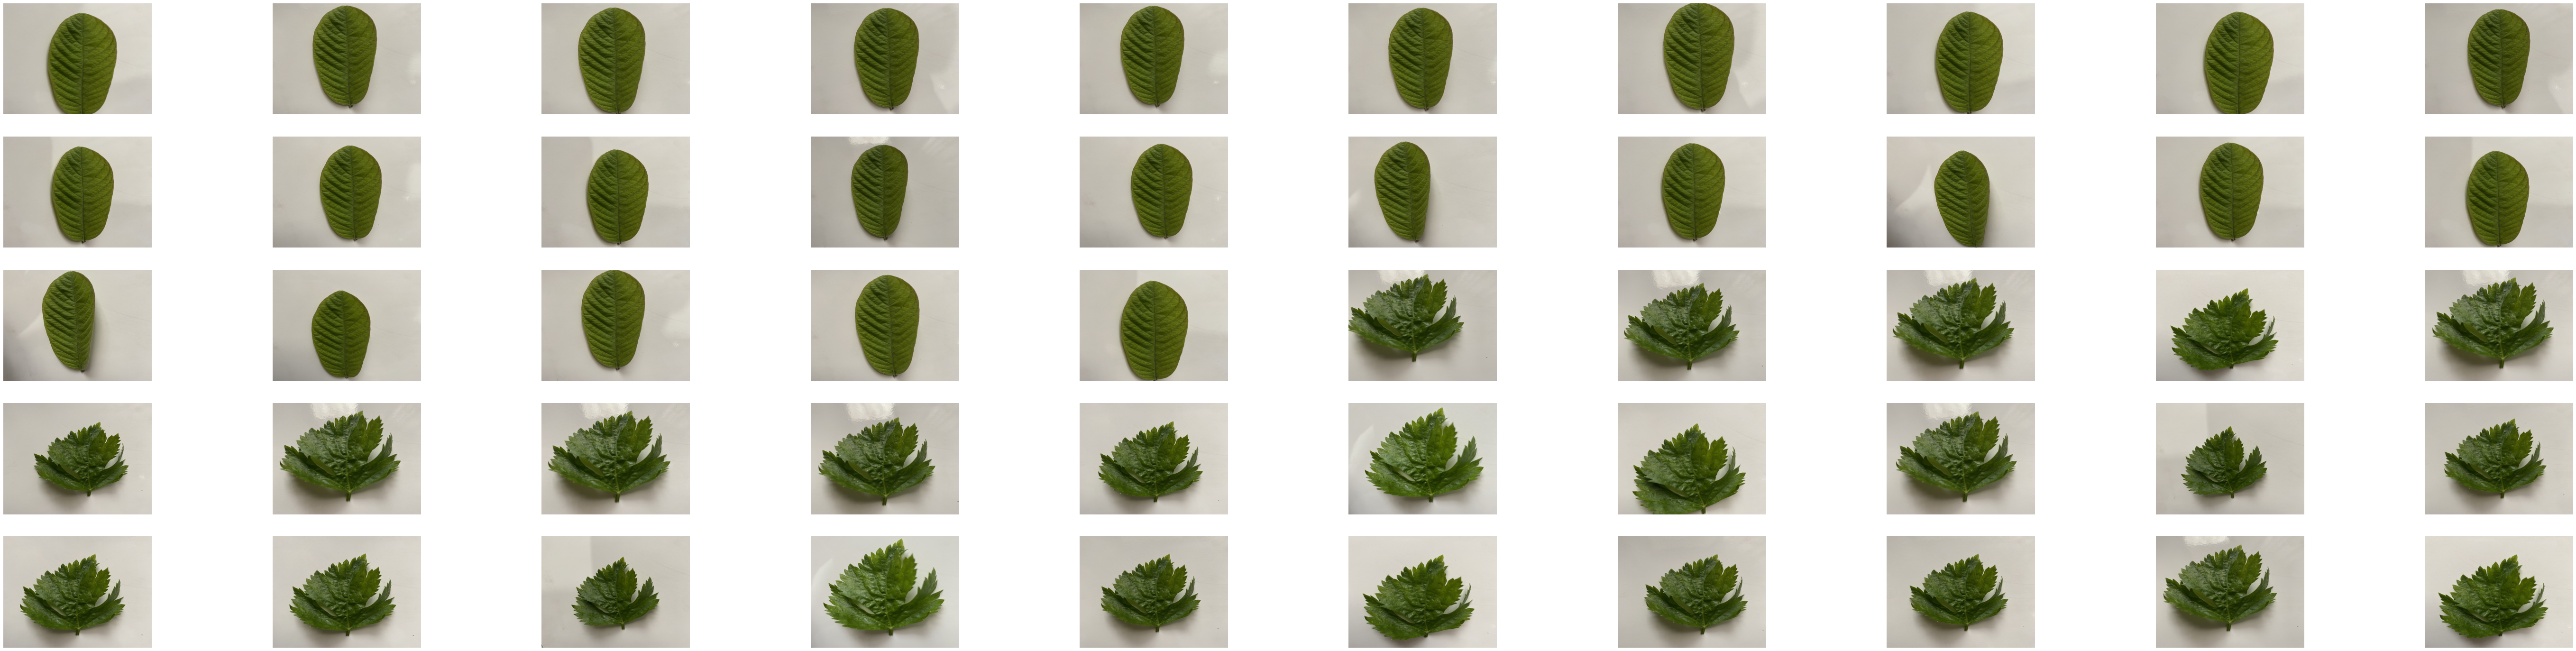

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 10, nrows * 5)

pic_index += 25
next_DaunJambuBiji_pix = [os.path.join(training_DaunJambuBiji_dir, fname) 
                for fname in training_DaunJambuBijis_fnames[pic_index-25:pic_index]]
next_DaunSeledri_pix = [os.path.join(training_DaunSeledri_dir, fname) 
                for fname in training_DaunSeledris_fnames[pic_index-25:pic_index]]

for i, img_path in enumerate(next_DaunJambuBiji_pix+next_DaunSeledri_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Setting arsitektur CNN (Konvolusi)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)

Setting arsitektur CNN (Fully Connected)

In [ ]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

Compile CNN

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Setting preparasi dataset dan augmentasi data train

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   vertical_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


Proses training

In [ ]:
import keras as tf
# define the checkpoint
checkpoint_filepath="/content/drive/MyDrive/AI/Dataset/Report/leaf-{epoch:02d}-{acc:.4f}-{val_acc:.4f}.h5"
model_checkpoint_callback = tf.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,  # 100 images = batch_size (10) * steps (10)
      epochs=15,
      validation_data=validation_generator,
      validation_steps=10,  # 100 images = batch_size (10) * steps (10)
      callbacks=[model_checkpoint_callback])

<ipython-input-58-e1f798239625>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
10/10 [==============================] - 67s 1s/step - loss: 1.4555 - acc: 0.5000 - val_loss: 0.6458 - val_acc: 0.5000
Epoch 2/15
10/10 [==============================] - 12s 1s/step - loss: 0.6945 - acc: 0.5400 - val_loss: 0.5484 - val_acc: 0.8500
Epoch 3/15
10/10 [==============================] - 12s 1s/step - loss: 0.9931 - acc: 0.6300 - val_loss: 0.5720 - val_acc: 1.0000
Epoch 4/15
10/10 [==============================] - 12s 1s/step - loss: 0.6276 - acc: 0.7100 - val_loss: 0.5095 - val_acc: 0.5200
Epoch 5/15
10/10 [==============================] - 13s 1s/step - loss: 0.4734 - acc: 0.7800 - val_loss: 0.4501 - val_acc: 0.6100
Epoch 6/15
10/10 [==============================] - 11s 1s/step - loss: 0.6833 - acc: 0.7700 - val_loss: 0.3889 - val_acc: 0.7100
Epoch 7/15
10/10 [==============================] - 12s 1s/step - loss: 0.4155 - acc: 0.8100 - val_loss: 0.2351 - val_acc: 0.9400
Epoch 8/15
10/10 [==============================] - 12s 1s/step - loss: 0.3733 - acc: 0.82

Menampilkan grafik selama pelatihan

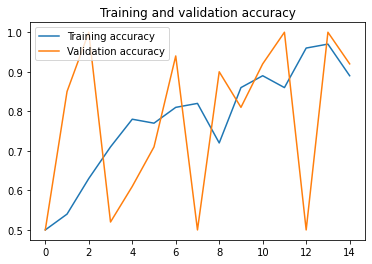

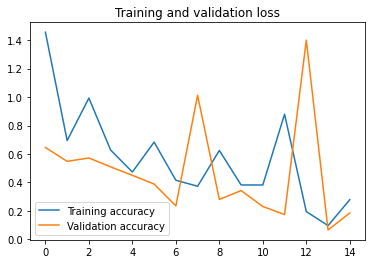

In [ ]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training accuracy')
plt.plot(epochs, val_loss, label='Validation accuracy')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Menyiapkan data uji menggunakan folder test

In [ ]:
import numpy
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_data_generator = val_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

Found 100 images belonging to 2 classes.


Prediksi

In [ ]:
predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.round(predictions, 0)

<ipython-input-61-67839a578df7>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)


Menyiapkan label kelas

In [ ]:
from keras import metrics
true_classes = test_data_generator.classes
class_labels = ['DaunJambuBiji','DaunSeledri']

Laporan hasil

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(true_classes, predicted_classes))

report = classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4)
print(report)

[[23 27]
 [19 31]]
               precision    recall  f1-score   support

DaunJambuBiji     0.5476    0.4600    0.5000        50
  DaunSeledri     0.5345    0.6200    0.5741        50

     accuracy                         0.5400       100
    macro avg     0.5411    0.5400    0.5370       100
 weighted avg     0.5411    0.5400    0.5370       100

